# Importing Necessary Libraries

In [1]:
import warnings, os, xlrd, pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import linear_model, preprocessing
 
%matplotlib inline
warnings.filterwarnings('ignore')

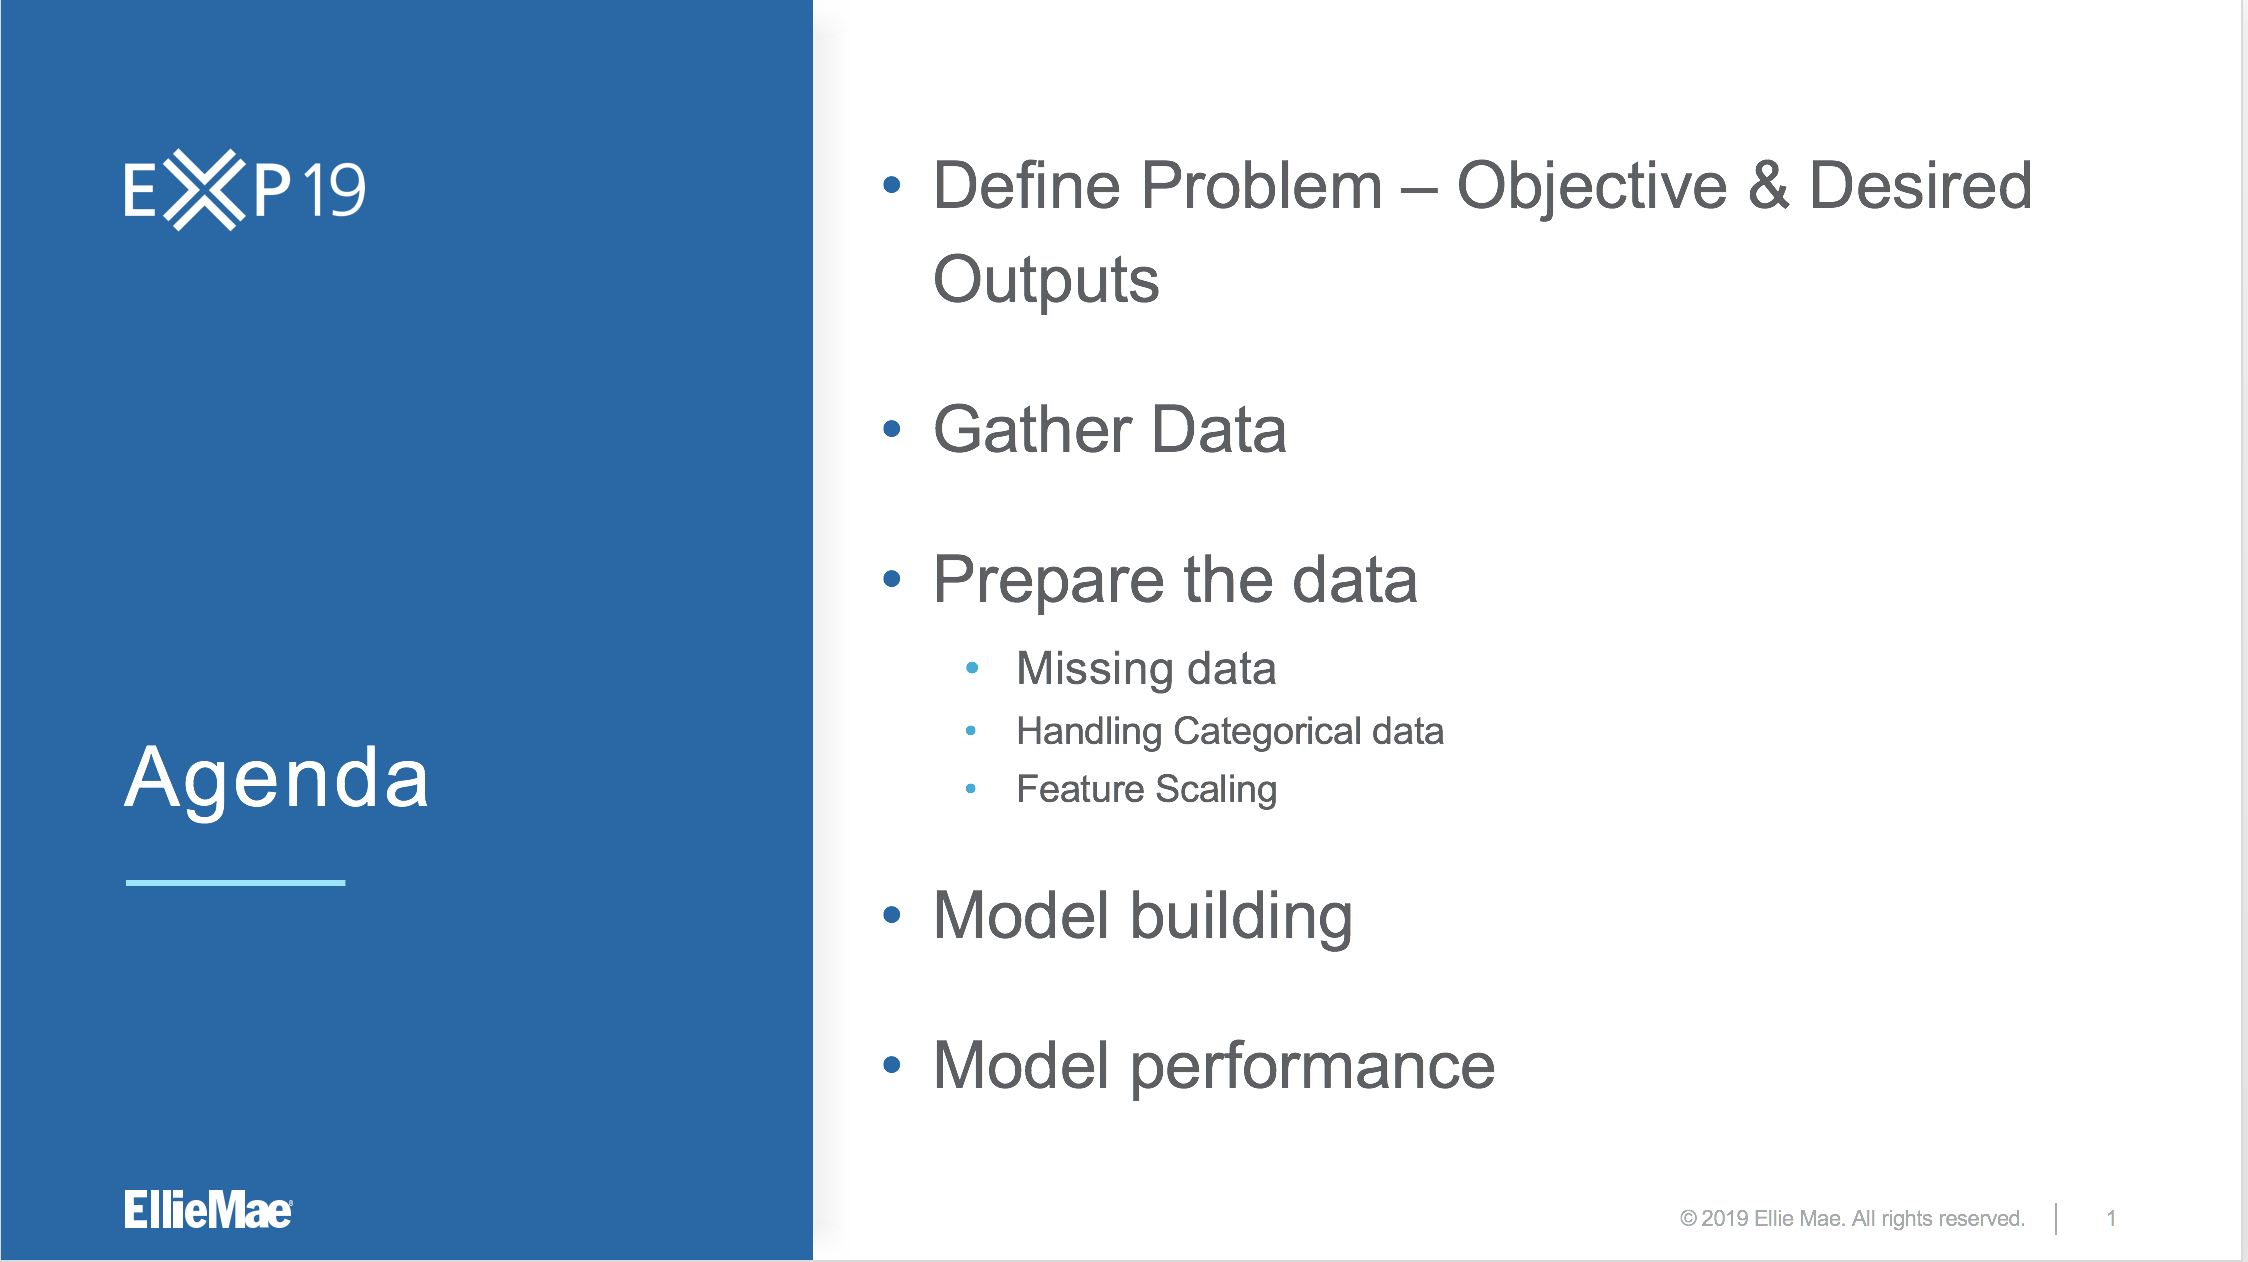

In [171]:
from IPython.display import Image
Image(filename='NotebookAgenda.png', width=900, height=700)

# Objective and Desired Outputs
### **Objective**: We want to predict whether a loan will be closed or not.     
### **Desired Outputs**: Given the features of a loan, predict whether it's going to be closed or not.


# Peek at Prediction Results

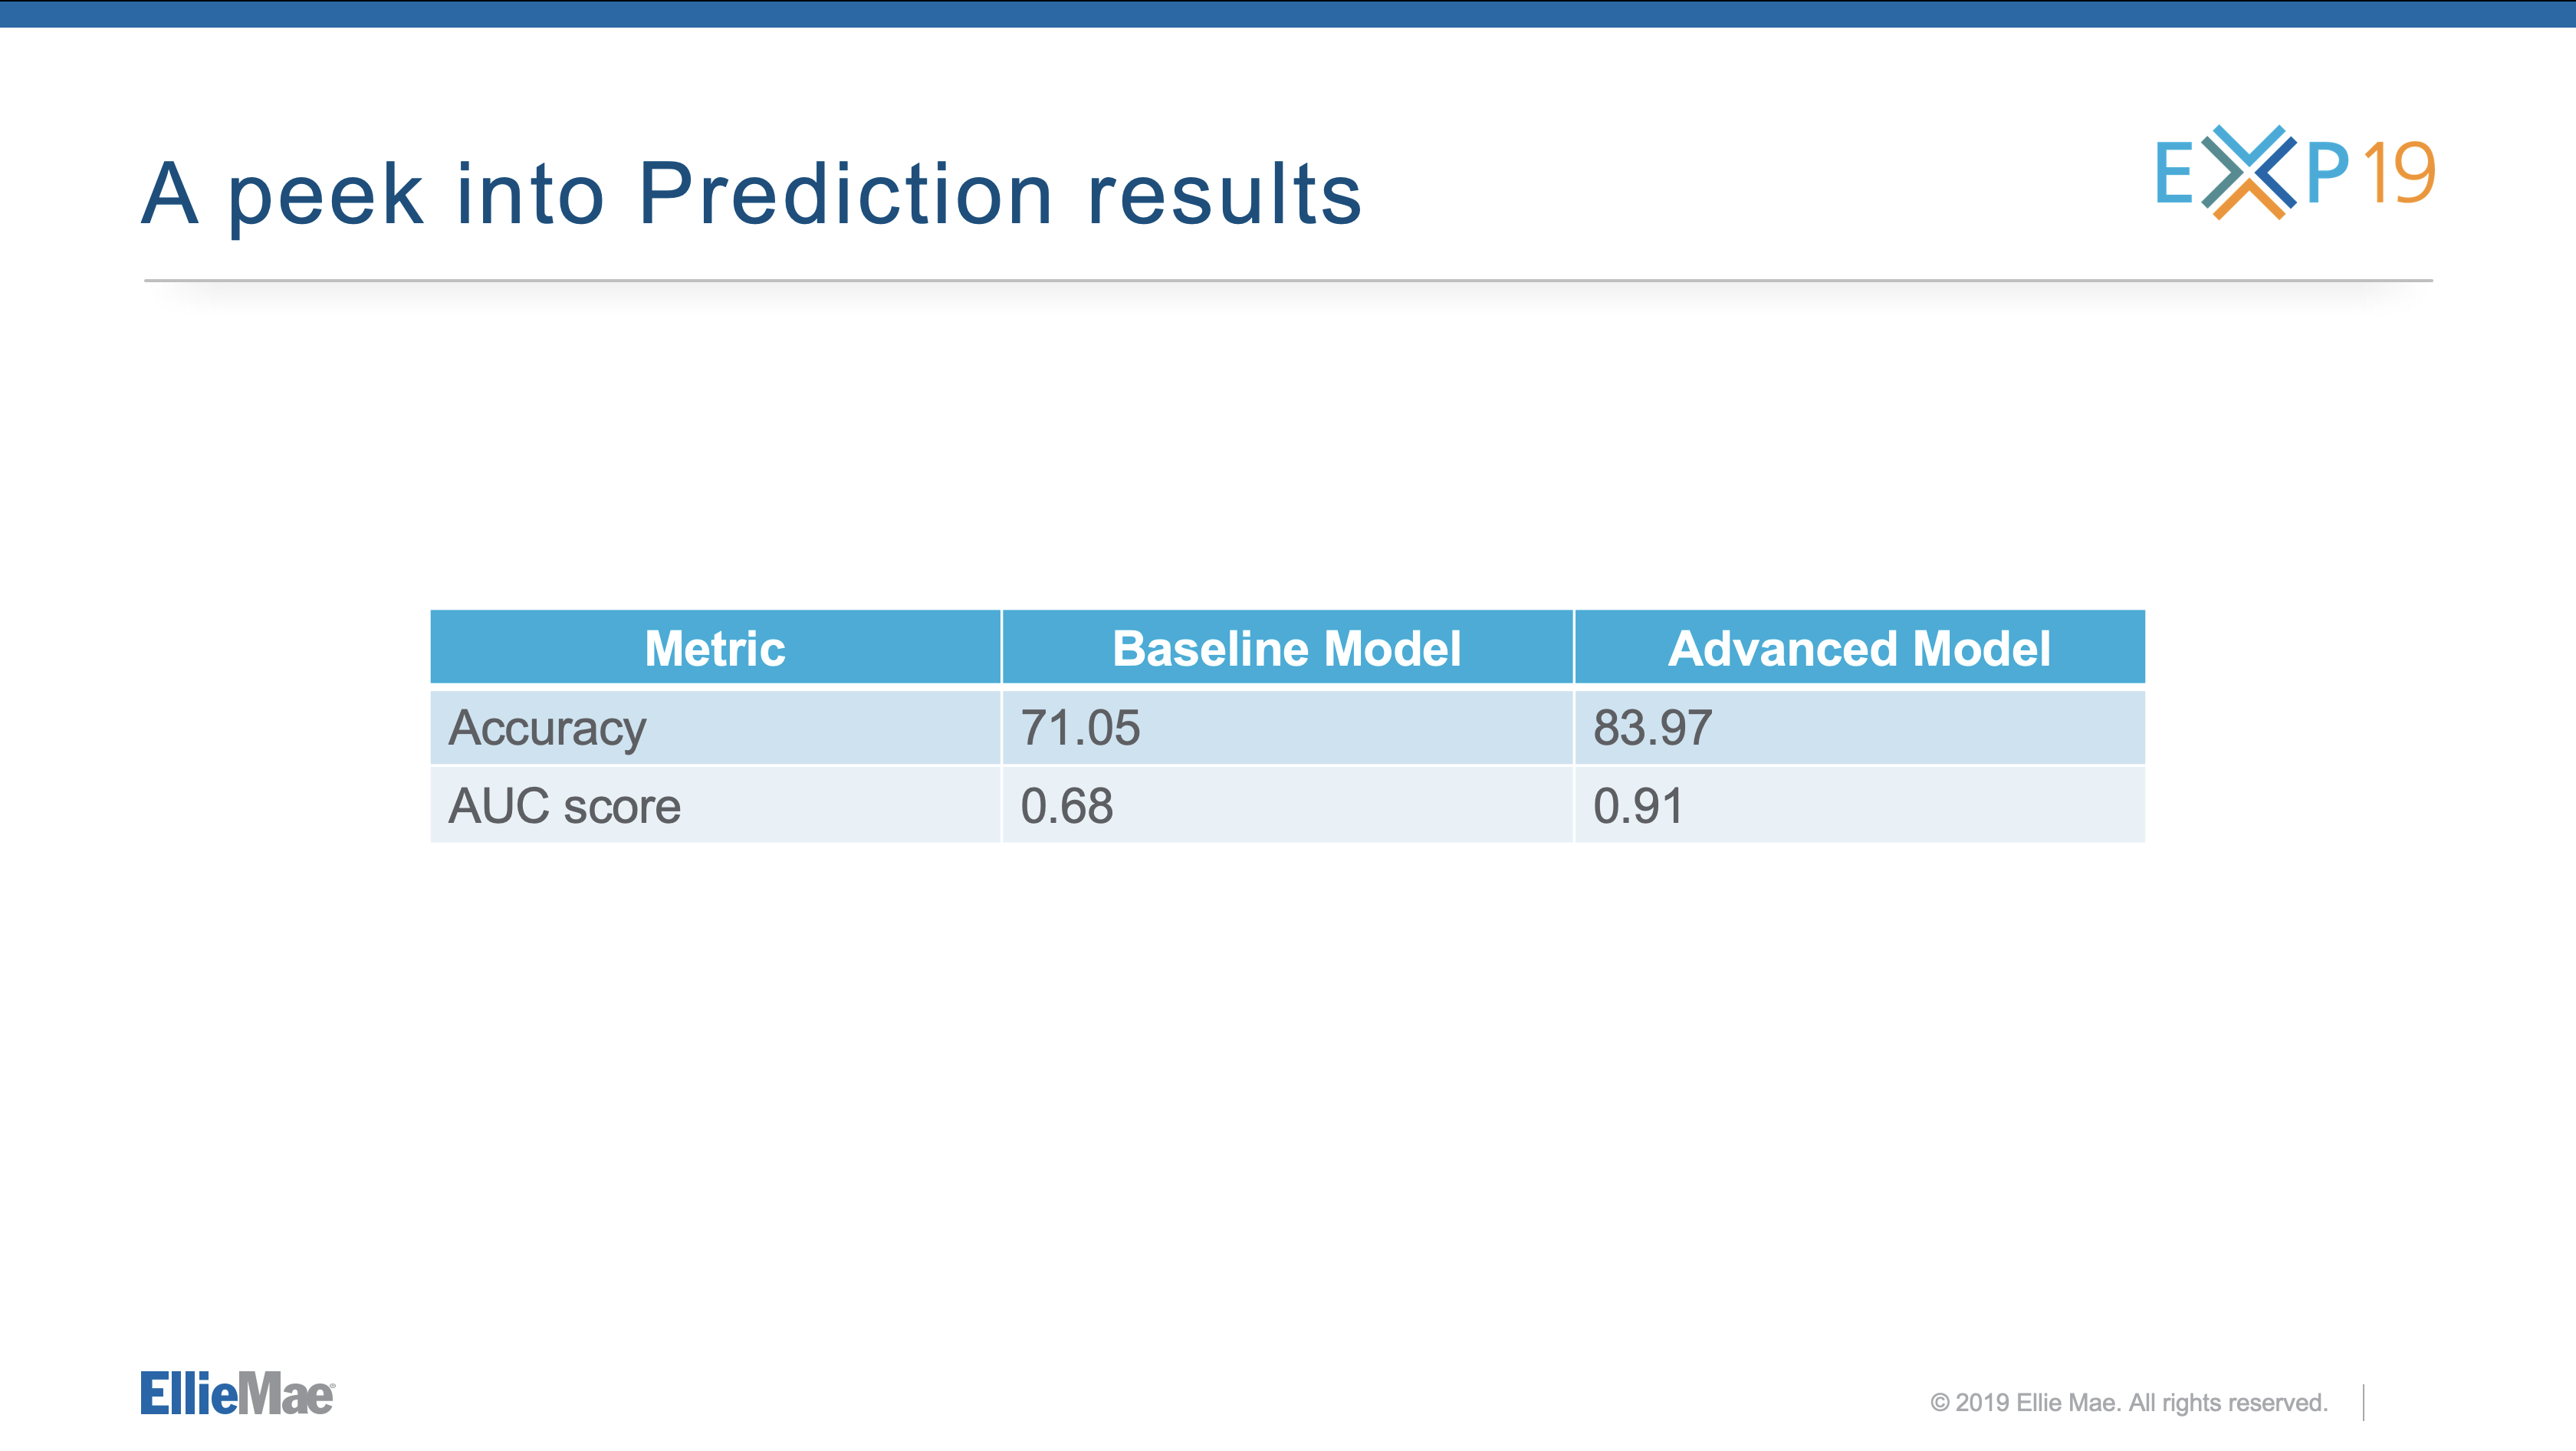

In [219]:
Image(filename='results.png', width=900, height=700)

# Gather Data
#### Data gathering is the first real step towards the success of a machine learning model. The quality of data will cascade in how good the model will be. 

(We collected data from several of our customers, where the loans were from in 2016. The numerical features are slightly modified to further ensure privacy.)

In [194]:
df = pd.read_csv('EXP_Data_DataScience.csv').drop(['Unnamed: 0'], axis=1)

In [195]:
# Let's take a look at the data of a sample loan
df.ix[1]

LoanType            Conventional
LoanPurpose            Refinance
AmortizationType           Fixed
LTV                           86
FICO                         661
DTI                           31
LoanAmount                168000
AppraisedValue            195000
EstimatedValue            195000
APR                            0
NoteRate                    3.25
TermInYears                   15
LoanStatus            Not_Closed
PropertyState                 OH
PropertyZip                44039
MSA                        17460
AgeBucket           Generation X
income                      6083
Name: 1, dtype: object

In [196]:
# To see some basic statistics of the numerical data, e.g. mean, STD, etc. 
df[['FICO', 'LTV', 'DTI', 'LoanAmount', 'AppraisedValue', 'EstimatedValue', \
          'NoteRate', 'APR','TermInYears','income']].describe()

,FICO,LTV,DTI,LoanAmount,AppraisedValue,EstimatedValue,NoteRate,APR,TermInYears,income
count,69366.000000,69366.000000,69366.000000,6.936600e+04,6.936500e+04,6.936600e+04,69348.000000,69366.000000,69366.000000,68786.000000
mean,723.600467,78.502278,38.946487,2.420887e+05,3.388200e+05,3.370905e+05,3.972018,0.043826,27.718061,7037.509242
std,63.541342,20.210746,16.070564,1.690301e+05,2.917991e+05,3.055578e+05,0.661694,0.204708,5.381646,9030.978701
min,300.000000,0.000000,0.000000,1.000000e+00,7.500000e+03,1.000000e+00,0.000000,0.000000,0.000000,-6667.710000
25%,680.000000,69.000000,30.000000,1.400000e+05,1.790000e+05,1.770000e+05,3.625000,0.000000,30.000000,3565.492500
50%,730.000000,80.000000,39.000000,2.069935e+05,2.660000e+05,2.650000e+05,3.875000,0.000000,30.000000,5265.865000
75%,778.000000,95.000000,45.000000,3.039750e+05,4.050000e+05,4.000000e+05,4.375000,0.000000,30.000000,8014.982500
max,840.000000,200.000000,200.000000,5.000000e+06,9.500000e+06,1.900000e+07,11.000000,1.000000,78.000000,616197.700000


In [197]:
print('Unique values of APR:', np.unique(df['APR']))

Unique values of APR: [0 1]


In [198]:
# Since APR is not what we thought it is, we are dropping it for now. 
df = df.drop('APR', axis=1)

In [199]:
# To see the first 5 rows of the data
df.head()

,LoanType,LoanPurpose,AmortizationType,LTV,FICO,DTI,LoanAmount,AppraisedValue,EstimatedValue,NoteRate,TermInYears,LoanStatus,PropertyState,PropertyZip,MSA,AgeBucket,income
0,FHA,Purchase,Fixed,97,749,37,112905,117000.0,117000,4.000,30,Closed,IN,46113,26900,Generation X,4473.73
1,Conventional,Refinance,Fixed,86,661,31,168000,195000.0,195000,3.250,15,Not_Closed,OH,44039,17460,Generation X,6083.00
2,FHA,Purchase,Fixed,96,704,42,77103,NaN,82000,3.375,30,Closed,ID,83401,26820,Generation X,1516.00
3,Conventional,Refinance,Fixed,24,822,44,312000,1276800.0,857500,3.625,30,Closed,HI,96826,46520,Traditionalists,5296.00
4,Conventional,Refinance,Fixed,78,749,36,208870,268000.0,261000,3.875,30,Closed,WA,98661,38900,Baby Boomers,3603.79


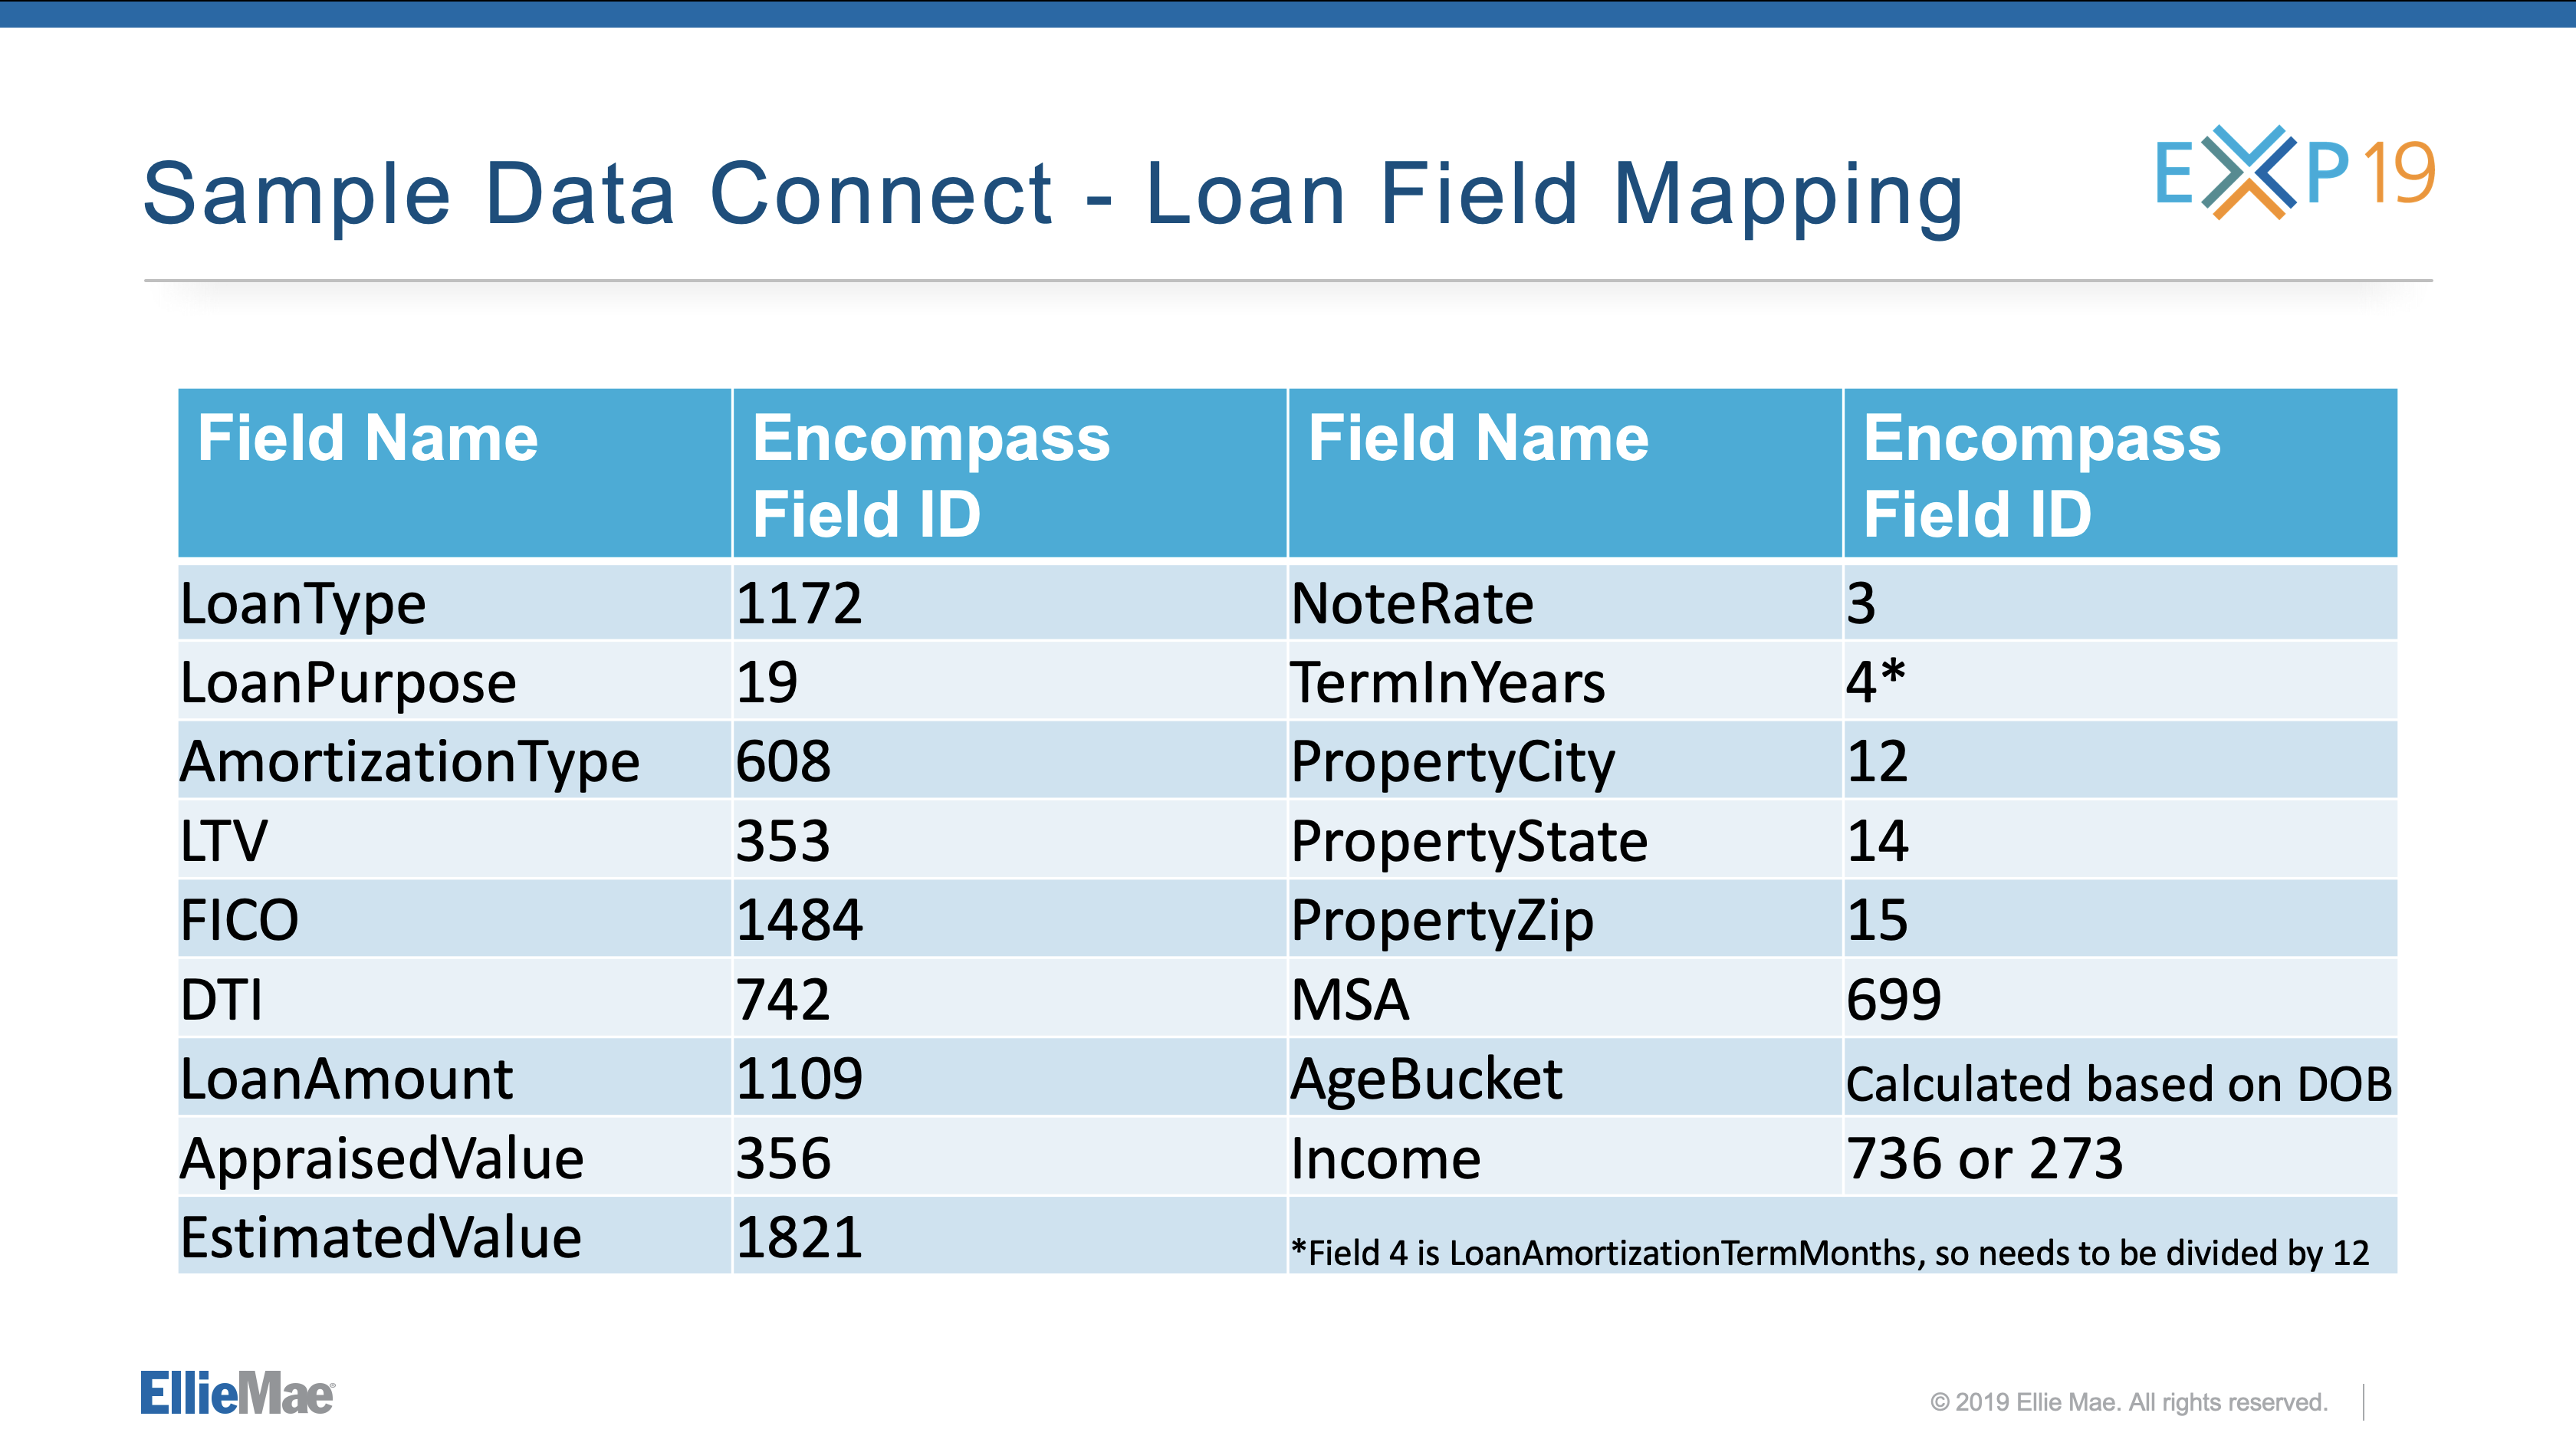

In [200]:
Image(filename='dataconnect.png', width=900, height=700)

# Preparing The Data
#### Before begining to train models we should transform our data in a way that can be fed into a Machine Learning model. The most common techniques are:
### **Dealing with missing data and outliers**
It is common to miss some values of data. It may be due to various reasons like errors on the data collection, measurements not applicable, etc. For the same reasons, there can be outliers with extreme values or values that doesn't make sense. For example, a FICO score of 851 is invalid but it will not be recognized by our model. 

Missing values are typically represented with the `NaN` or `Null`. The problem is that most algorithms can’t handle  missing values. Therefore, we need to take care of them before feeding data to our models. Once they are identified, there are several ways to deal with them:

1) Eliminating the samples or features with missing values/outliers. (we risk to lose relevant information or too many samples) **[We are using this method below]**

2) Populating the missing values/outliers with some other values. One common approach is to set them as the mean/median/mode value of the rest of the samples.

In [201]:
df.head()

,LoanType,LoanPurpose,AmortizationType,LTV,FICO,DTI,LoanAmount,AppraisedValue,EstimatedValue,NoteRate,TermInYears,LoanStatus,PropertyState,PropertyZip,MSA,AgeBucket,income
0,FHA,Purchase,Fixed,97,749,37,112905,117000.0,117000,4.000,30,Closed,IN,46113,26900,Generation X,4473.73
1,Conventional,Refinance,Fixed,86,661,31,168000,195000.0,195000,3.250,15,Not_Closed,OH,44039,17460,Generation X,6083.00
2,FHA,Purchase,Fixed,96,704,42,77103,NaN,82000,3.375,30,Closed,ID,83401,26820,Generation X,1516.00
3,Conventional,Refinance,Fixed,24,822,44,312000,1276800.0,857500,3.625,30,Closed,HI,96826,46520,Traditionalists,5296.00
4,Conventional,Refinance,Fixed,78,749,36,208870,268000.0,261000,3.875,30,Closed,WA,98661,38900,Baby Boomers,3603.79


In [202]:
df = df.dropna(how='any').reset_index(drop=True)

### **Handling Caterogical Data**
When dealing with categorical data, we work with ordinal and nominal features. Ordinal features are categorical features that can be sorted (cloth’s size: L>M>S). While nominal features don’t imply any order (cloth’s color: yellow, green, red). The methods to deal with ordinal and nominal features are:

1) **Mapping ordinal features:** to make sure that the algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Frequently we will do this mapping manually. Example: L:2, M:1, S:0.

2) **Encoding nominal class labels:** The most common approach is to perform one-hot encoding, which consists in creating a new dummy feature for each unique value in the nominal feature column. Example: in the loan purpose column, if we have two classes: `Purchase` and `Refinance`, and perform one-hot encoding, we will get two new columns, one for each unique class. Then, if we have a Purchase loan, it will be sampled as: `Purchase` = 1, `Refinance` = 0. **[We are using this method below]**

In [203]:
print('Unique values of loan purposes', np.unique(df.LoanPurpose))

Unique values of loan purposes ['Other' 'Purchase' 'Refinance']


In [204]:
df = df.join(pd.get_dummies(df['LoanType']))
df = df.drop(['LoanType'], axis=1)
df = df.rename(index=str, columns={"Other": "OtherLoanType"})
df = df.rename(index=str, columns={"VA": "VALoan"})

df = df.join(pd.get_dummies(df['LoanPurpose']))
df = df.drop(['LoanPurpose'], axis=1)
df = df.drop(['AmortizationType'], axis=1)
df = df.rename(index=str, columns={"Other": "OtherLoanPurpose"})

df = df.join(pd.get_dummies(df['AgeBucket']))
df = df.drop(['AgeBucket'], axis=1)

df = df.join(pd.get_dummies(df['PropertyState']))
df = df.drop(['PropertyState'], axis=1)

LABEL_COLUMN = 'LoanStatus'

In [205]:
df.ix[0]

LTV                      97
FICO                    749
DTI                      37
LoanAmount           112905
AppraisedValue       117000
EstimatedValue       117000
NoteRate                  4
TermInYears              30
LoanStatus           Closed
PropertyZip           46113
MSA                   26900
income              4473.73
Conventional              0
FHA                       1
OtherLoanType             0
VALoan                    0
OtherLoanPurpose          0
Purchase                  1
Refinance                 0
Baby Boomers              0
Generation X              1
Millennials               0
Other                     0
Traditionalists           0
AK                        0
AL                        0
AR                        0
AZ                        0
CA                        0
CO                        0
                     ...   
ME                        0
MI                        0
MN                        0
MO                        0
MS                  

# **Feature Scaling**
This is a crucial step in the preprocessing phase as the majority of machine learning algorithms perform much better when dealing with features that are on the same scale. The most common techniques are:


1) **Normalization:** it refers to rescaling the features to a range of `[0,1]`. To normalize our data we’ll simply need to apply the min-max scaling method to each feature column.

$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$

2) **Standardization:** it consists in centering the feature columns to have mean ($\mu$) = 0 with standard deviation ($\sigma$) = 1 so that the feature columns have the same parameters as a standard Normal distribution. This makes it easier for model to learn. In addition, it keeps useful information about outliers and makes the algorithms less sensitive to them.

$z = \frac{x - \mu}{\sigma}$

$\mu$ = mean

$\sigma$ = standard deviation



In [206]:
df['DTI'] = preprocessing.scale(df['DTI'])

# **Balancing Data Set**

In [207]:
closed_loans = df.ix[df['LoanStatus'] == 'Closed',:]
non_closed_loans = df.ix[df['LoanStatus'] == 'Not_Closed',:]

n = 15000
non_closed_loans = pd.concat([non_closed_loans, \
                              non_closed_loans.iloc[np.random.randint(len(non_closed_loans), \
                                                                      size=n)]])

# Now combine closed and non_closed loans by concatenating 
# the closed/non-closed loans into one dataframe
df = pd.concat([non_closed_loans, closed_loans])

# Reset index and then shuffle the data
df = df.copy().reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df[LABEL_COLUMN] = (df[LABEL_COLUMN].apply(lambda x: x == 'Closed')).astype(int)

### Closed Loans: 59467, Not-Closed Loans: 9299

### After this procedure, Closed Loans: 59467, Not-Closed Loans: 24299

# Train/Test Data Split
### When traning/testing your model, you want to save a small portion of your data to test. Here we train on 80% of the data, randomly selected, and reserve remaining data to test the model performance. 

In [208]:
train, test = train_test_split(df, test_size = 0.2)
train, test = train.reset_index(), test.reset_index()
train, test = train.drop('index', axis=1), test.reset_index().drop(['index', 'level_0'], axis=1)

print('  train shape ={}, test shape={}'.format(train.shape, test.shape))

X = train.ix[:, train.columns != LABEL_COLUMN]
Y = train[LABEL_COLUMN]

  train shape =(67012, 73), test shape=(16753, 73)


In [209]:
def modelfit(model, data, predictors, outcome, useTrainCV=True, n_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(data[predictors].values, label=outcome)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=n_folds,
                         metrics='auc', early_stopping_rounds=early_stopping_rounds)
        print (cvresult.shape[0]-1)
        #print (cvresult.iloc(cvresult.shape[0]-1))
        model.set_params(n_estimators=cvresult.shape[0])
        #print (cvresult)
    
    # Fit the model on data
    model.fit(data[predictors], outcome, eval_metric='auc')
    
    # Predict training set
    predictions = model.predict(data[predictors])
    probs = model.predict_proba(data[predictors])[:,1]
    
    print ("\nModel report: ")
    print ("Accuracy: {}".format(round(metrics.accuracy_score(outcome, predictions)*100.0, 2)))
    print ("AUC score (train): %f" % metrics.roc_auc_score(outcome, probs))
    
    my_colors = ['purple', 'magenta', 'yellow', 'orange', 'blue', 'green', 'red']
    feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values()
    feat_imp.plot(kind="bar", title="Important features", color=my_colors)
    plt.ylabel("Feature Importance Score")
    return model

import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def print_model_metrics(preds, probs, model, labels,is_xgb=False):
    print ("\nModel Report")
    print ("Accuracy of the model: {}".format(round(metrics.accuracy_score(labels, preds)*100.0,2)))
    print ("AUC score: %f" % metrics.roc_auc_score(labels, probs))
    print ("Matthews Correlation coefficient: %f" % metrics.matthews_corrcoef(labels, preds))
    print ("\nPrecision, Recall, F1beta, Support: ")
    print (metrics.precision_recall_fscore_support(labels, preds, average='weighted'))
    print ("F1-score: %f" % metrics.f1_score(labels, preds, average='weighted'))
    
    if is_xgb:
        my_colors = ['purple', 'magenta', 'yellow', 'orange', 'blue', 'green', 'red']
        feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values()
        feat_imp.plot(kind="bar", title="Important features", color=my_colors)
        plt.ylabel("Feature Importance Score")
    
    cnf_matrix = metrics.confusion_matrix(labels, preds)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Loan Not Closed', 'Loan Closed'])

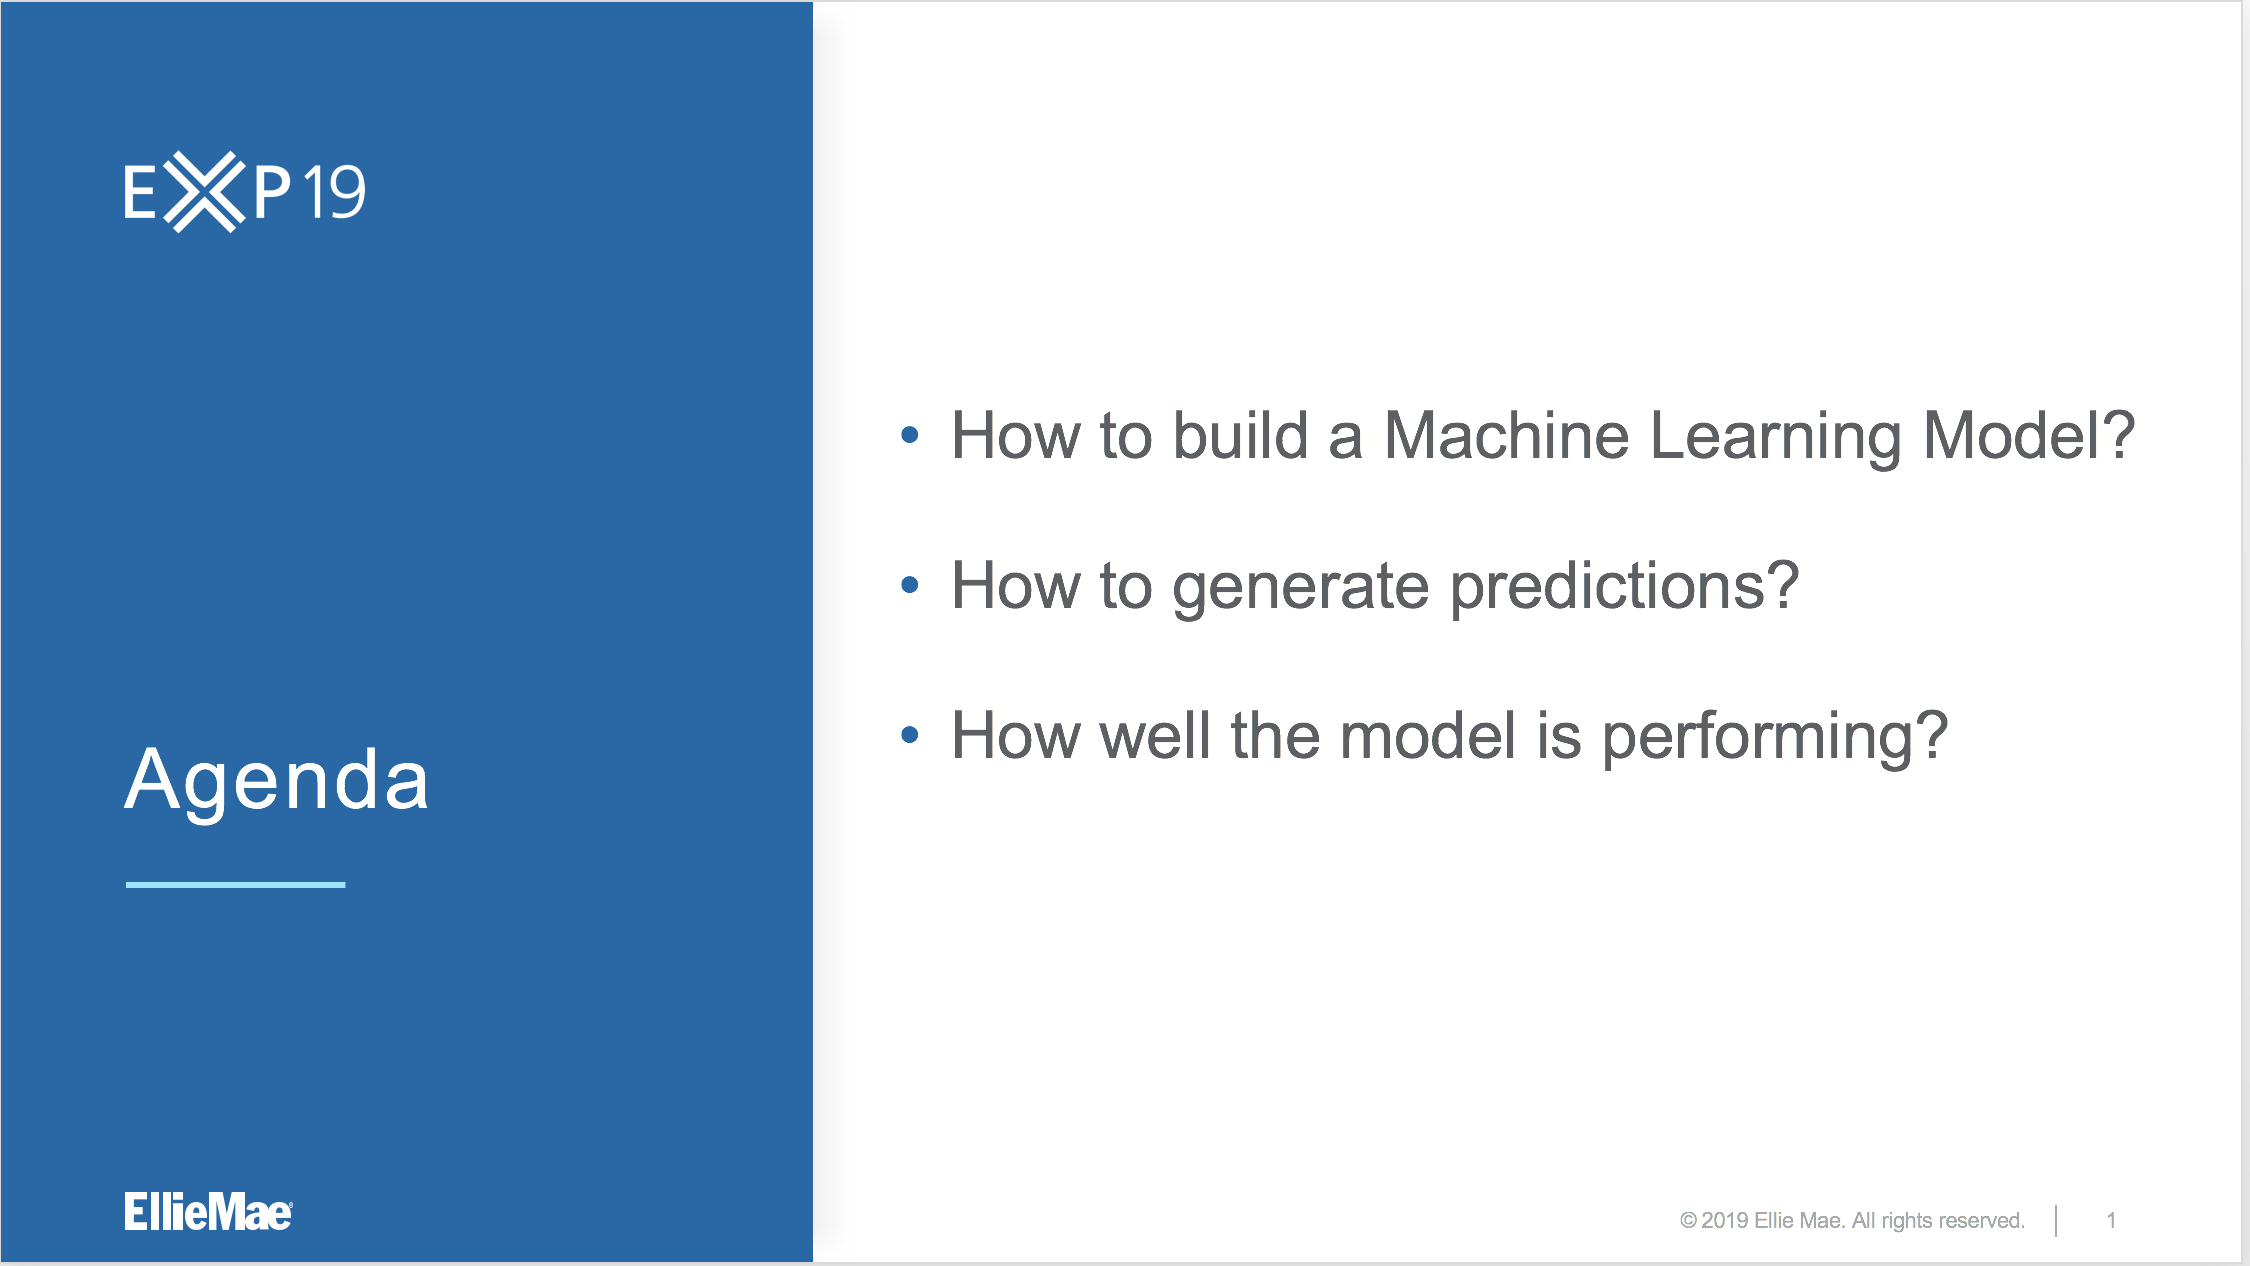

In [210]:
from IPython.display import Image
Image(filename='ModelAgenda.png', width=900, height=700)

# Modeling

## 1. Model training on dataset

### Baseline Model - Logistic Regresssion

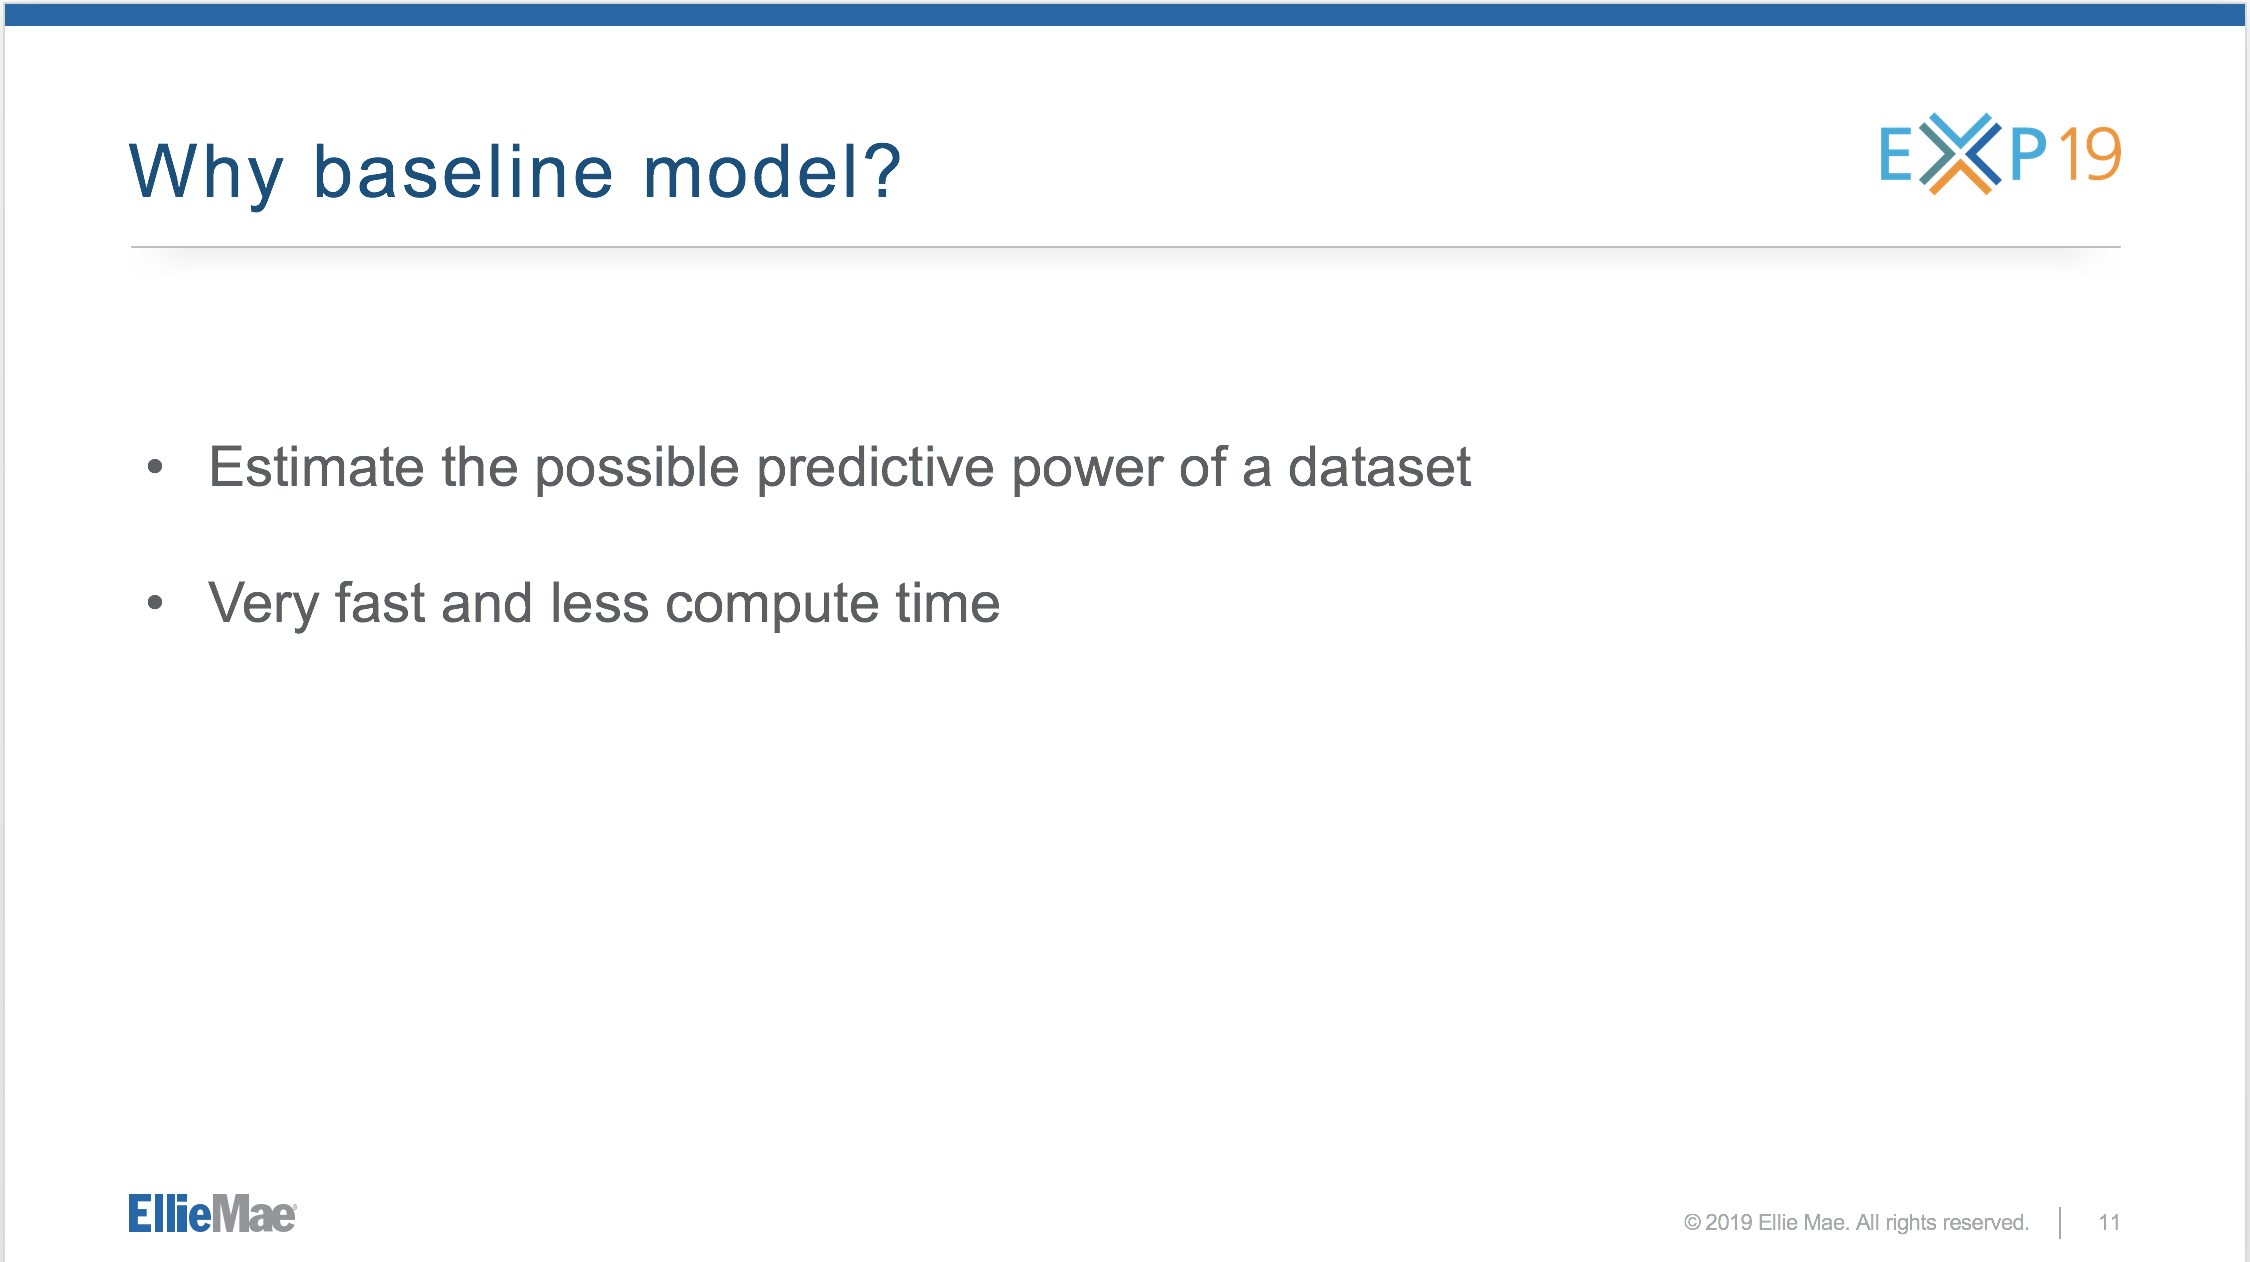

In [211]:
from IPython.display import Image
Image(filename='baseline.png', width=900, height=700)

#### Features  - FICO score, Income, Debt-To-Income ratio, Loan Amount, Loan Type, Loan Purpose, Term in Years, etc.
#### Outcome - Probability whether a loan application is going to be closed or not

In [212]:
# Logistic Regression Classifier
logreg = linear_model.LogisticRegression(C=1e5)

# Fit training data
logreg.fit(X, Y);

print("Completed model training and generation")

Completed model training and generation


# 2. Predictions on test data set using the generated model

In [213]:
# Let's try the model on test dataset
test_y = logreg.predict(test.ix[:, test.columns != LABEL_COLUMN])
print("Completed test dataset predictions")

Completed test dataset predictions


# 3. Model performance

### a. Accuracy

In [214]:
correct = np.sum(test_y == test[LABEL_COLUMN].values)
print("Number of correct predictions: {}".format(correct))
print("Number of wrong predictions: {}".format(len(test) - correct))                 

Number of correct predictions: 11903
Number of wrong predictions: 4850


In [215]:
print('Accuracy is %.2f' %(np.sum(test_y == test[LABEL_COLUMN].values)*100/len(test)))

Accuracy is 71.05


#### Data is not perfectly balanced

### b. Confusion Matrix

[[   73  4801]
 [   49 11830]]

Confusion Matrix for class - Loan Closed


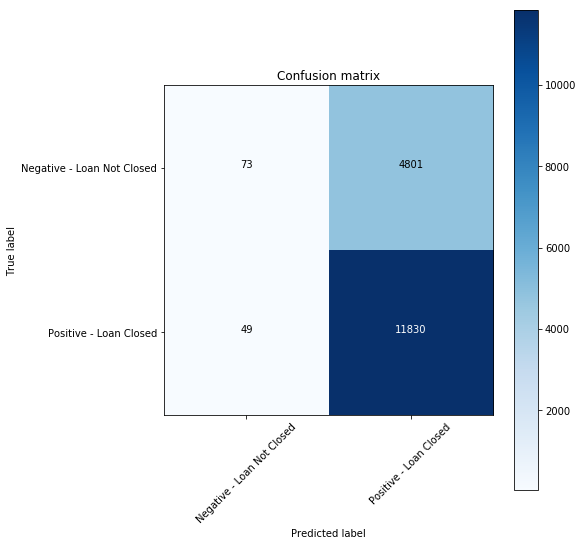

In [218]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test[LABEL_COLUMN].values, test_y)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative - Loan Not Closed', 'Positive - Loan Closed'])
print("")
print("Confusion Matrix for class - Loan Closed")

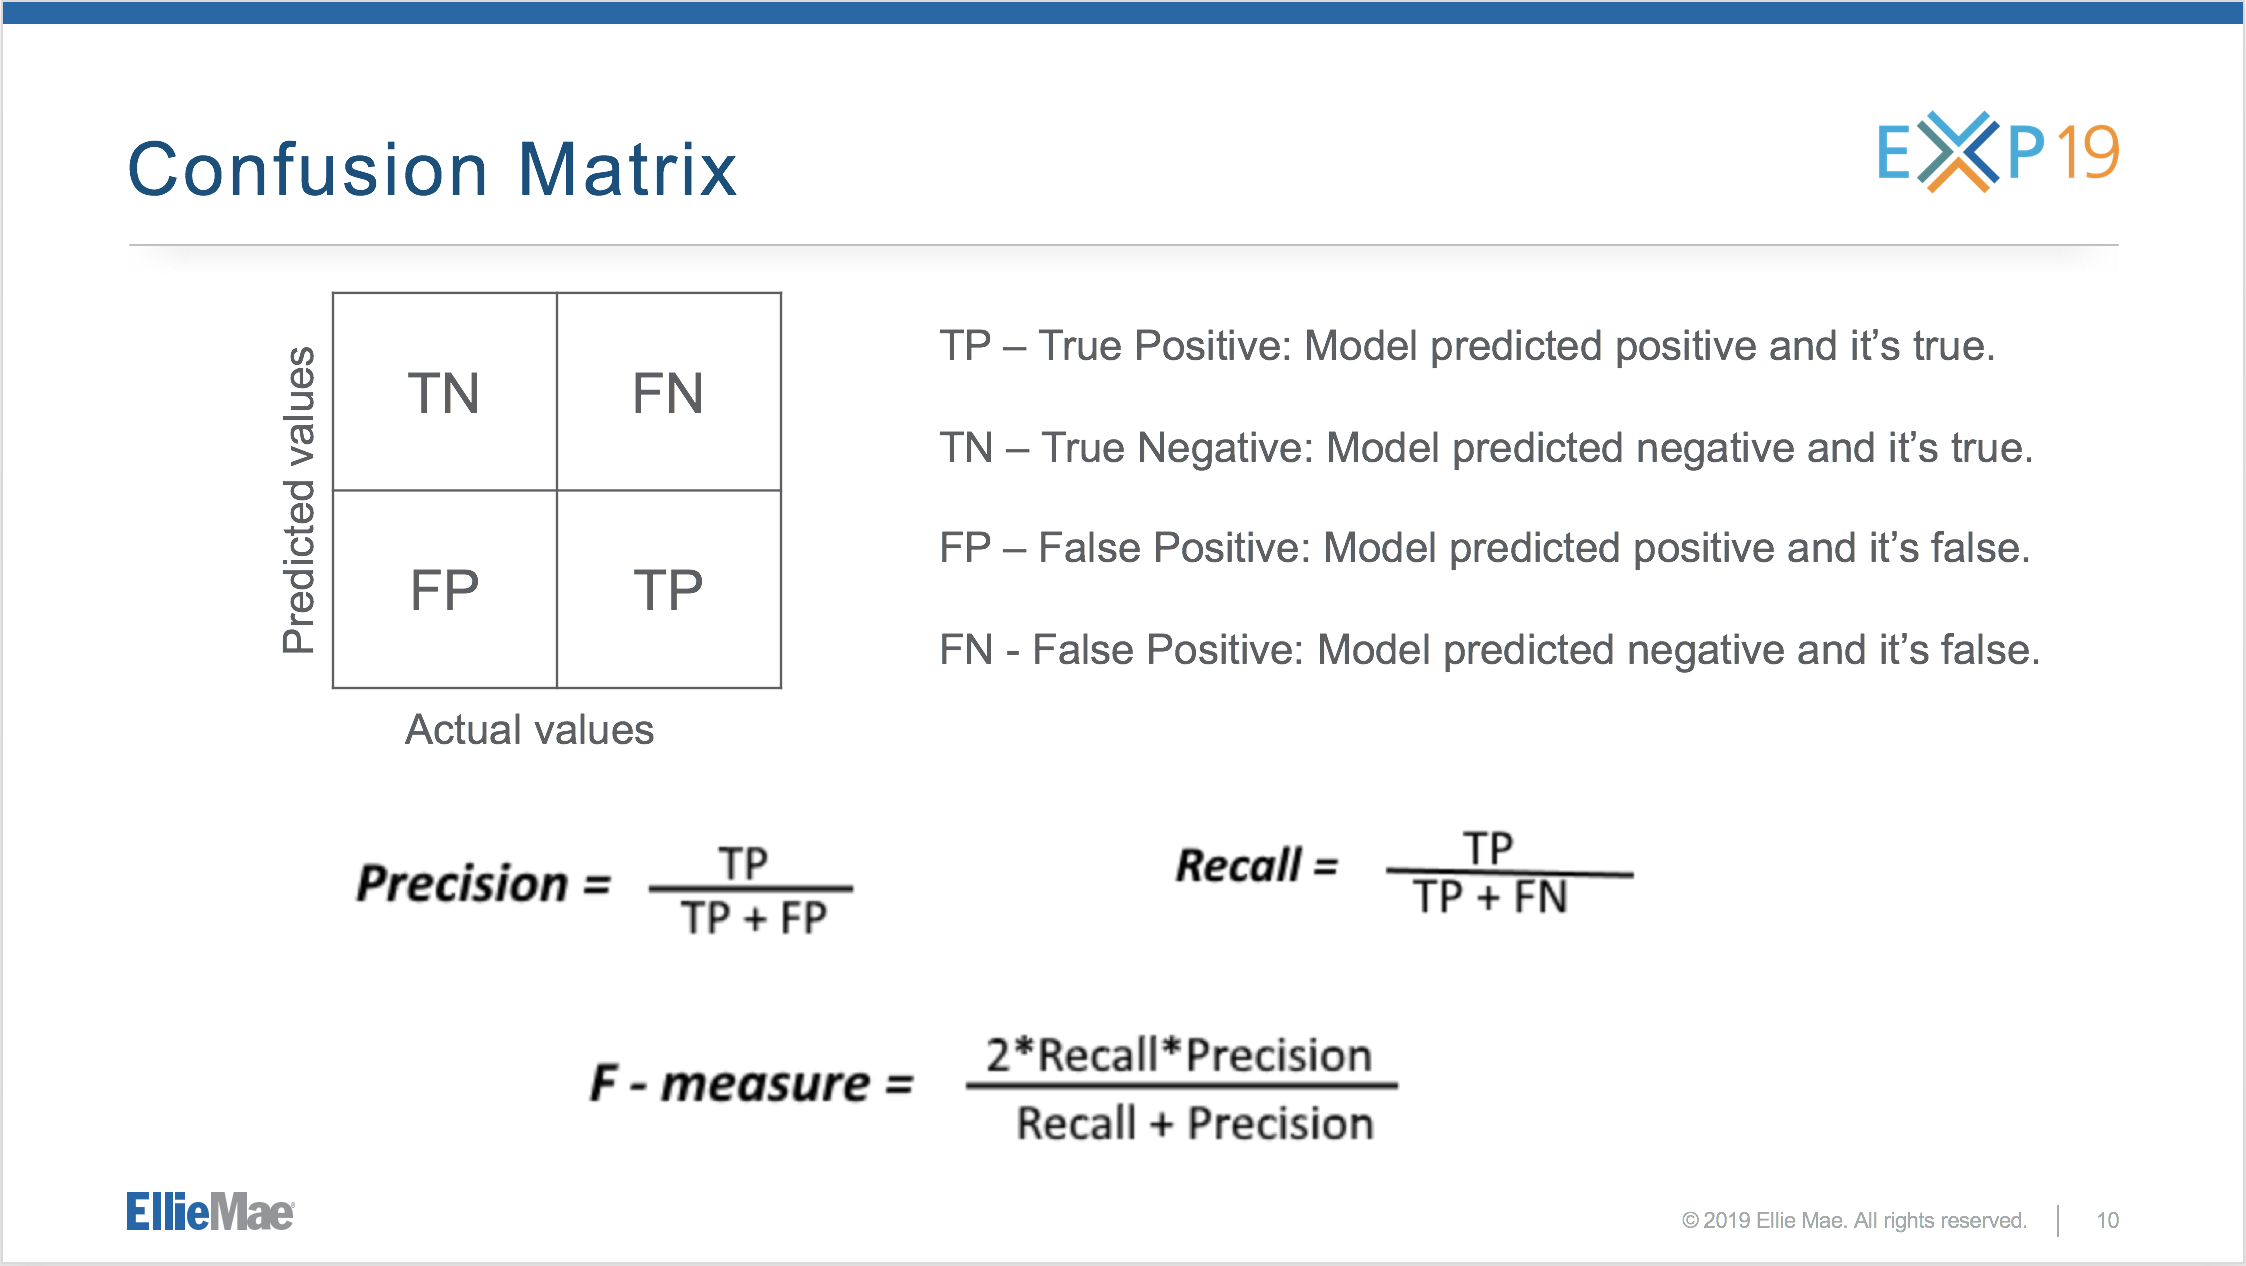

In [217]:
from IPython.display import Image
Image(filename='confusionmatrix.png', width=900, height=700)

### c. Precision, Recall and F-Score 

In [143]:

def F_beta(beta, p, r):
    return (1 + beta**2)*(p * r)/(beta**2 * p + r)

precision = precision_score(test[LABEL_COLUMN].values, test_y)
recall = recall_score(test[LABEL_COLUMN].values, test_y)

print('Precision is {:.2f}'.format(precision))
print('Recall is {:.2f}'.format(recall))
print('F-score is {:.2f}'.format(F_beta(0.5, precision, recall)))


Precision is 0.80
Recall is 1.00
F-score is 0.83


AUC is 0.68


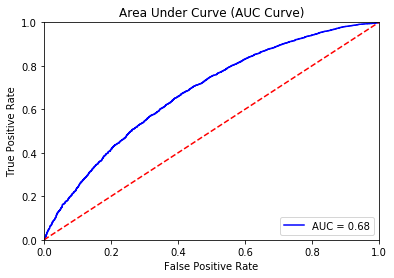

In [144]:
y_score = logreg.fit(X, Y).decision_function(test.ix[:, test.columns != LABEL_COLUMN])

fpr, tpr, _ = roc_curve(test[LABEL_COLUMN].ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

print('AUC is %.2f' %roc_auc)

plt.title('Area Under Curve (AUC Curve)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### e. Let's try out a more advanced model

In [146]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

predictors = ['LTV', 'FICO', 'DTI', 'LoanAmount', 'AppraisedValue', 'Fixed', 'APR', 'NoteRate', 'TermInYears',
             'income', 'Conventional', 'FHA', 'VALoan', 'OtherLoanType', 'Purchase', 'Refinance']

xgb_clf = XGBClassifier(learning_rate=0.1,
                       n_estimators=1000,
                       max_depth=5,
                       min_child_weight=1,
                       gamma=0,
                       subsample=0.8,
                       colsample_bytree=0.8,
                       objective='binary:logistic',
                       scale_pos_weight=1)

model = modelfit(xgb_clf, X, predictors, Y)


Model Report
Accuracy of the model: 83.97
AUC score: 0.913319
Matthews Correlation coefficient: 0.678626

Precision, Recall, F1beta, Support: 
(0.8410062895520292, 0.8397346600331675, 0.8390907489543932, None)
F1-score: 0.839091
[[5556 1500]
 [ 916 7103]]


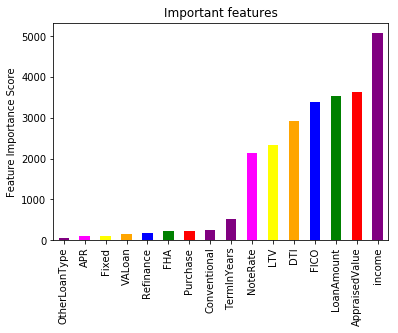

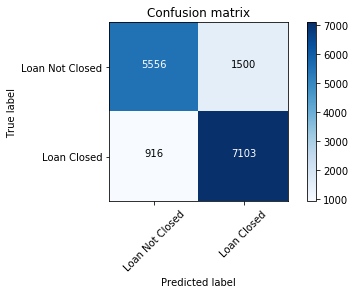

In [84]:
test_y = xgb_clf.predict(test[predictors])
test_probs = xgb_clf.predict_proba(test[predictors])[:,1]

print_model_metrics(test_y, test_probs, xgb_clf, test[LABEL_COLUMN].values, True)